## Part 1 - simple usage of KMeans using self generated 2D data

In [1]:
# imports
from sklearn.datasets import make_blobs  # Import a method for creating our test data
from sklearn.cluster import KMeans  # Import the KMeans from sklearn clusering library
import matplotlib.pyplot as plt  # matplotlib is a great tool for visualizing data in python

****Let's create a dataset with two features(2D) and 3 centers using [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)****

In [2]:

X, _ = make_blobs(n_samples=1000, centers=3, n_features=2,
                 random_state=0, cluster_std=0.5)  # Initializing the data with two features and two centriods

****Let's plot the data set using [scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) function from matplotlib.plt****

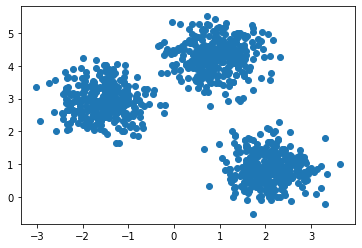

In [3]:
plt.scatter(X[:,0],X[:,1])  # Visualizing the data

***Now the time has came to train our model using fit function.***
- in machine learning general model.fit(X) represents the training process of our model

In [4]:
kmeans = KMeans(n_clusters=3)  # Constructing the KMeans algorithm with 3 clusters
kmeans.fit(X)  # Fitting the data - letting the algorithm to train itself and find the most optimal clusters

KMeans(n_clusters=3)

***Let's get the clusters that our model has assigned to specific data points***

In [5]:
labels = kmeans.labels_  # Get labels assigned to the samples by Kmeans
labels[1:10]  # Display cluster_id for first 10 samples

array([0, 2, 2, 2, 1, 0, 0, 1, 0])

***Let's get the clusters' centroids***

In [6]:
cluster_centers = kmeans.cluster_centers_  # coordinates of the cluster centriods
cluster_centers

array([[ 0.91374352,  4.27817158],
       [ 2.09149851,  0.88277136],
       [-1.54973205,  2.93199032]])

***Now we will plot our data and use the labels assigned by KMeans to color it. We will also plot the cluster centroids as red crosses, to visualize the centers of each cluster***

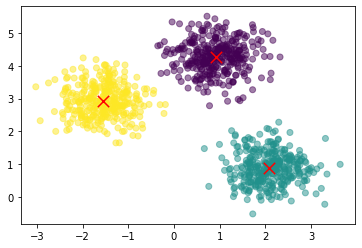

In [7]:
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.5)  # Plot all of the samples and base the color on the label assigned
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color='r', s=130)  # Plot the centroids

## Part 2 - how about when we don't know the number of clusters?

Well let's try and see what happens when we use the same data set but different number of clusters

In [8]:
kmeans_bad = KMeans(n_clusters = 2).fit(X)

In [9]:
wrong_labels = kmeans_bad.labels_  # Just like last time let`s see what labels KMeans assgined to our data
wrong_cluster_centroids = kmeans_bad.cluster_centers_  # Get the centroid cooridantes

***Now our KMeans is going to optimize the data using only two centriods.***

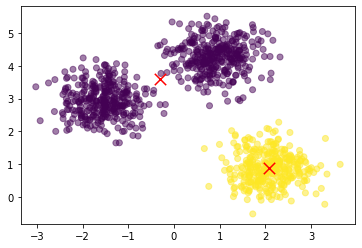

In [10]:
plt.scatter(X[:,0], X[:,1], c=wrong_labels, alpha=0.5)  # Plot all of the samples and base the color on the label assigned
plt.scatter(wrong_cluster_centroids[:,0], wrong_cluster_centroids[:,1], marker="x", color='r', s=130)  # Plot the centroids

- The two "top" clusters got merged into one which is quite intuitive based on the spread of our data - two clusters are relatively close to each other therefore putting a centriod inbetween them minimizes the eucledian distance quite correct. 
- The purple's cluster centroid remain unchanged.

**What will happen if we set the number of clusters to be equal to 5?**

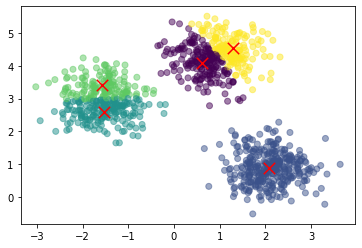

In [11]:
kmeans_bad = KMeans(n_clusters = 5).fit(X)

wrong_labels = kmeans_bad.labels_  # Just like last time let`s see what labels KMeans assgined to our data
wrong_cluster_centroids = kmeans_bad.cluster_centers_  # Get the centroid cooridantes

plt.scatter(X[:,0], X[:,1], c=wrong_labels, alpha=0.5)  # Plot all of the samples and base the color on the label assigned
plt.scatter(wrong_cluster_centroids[:,0], wrong_cluster_centroids[:,1], marker="x", color='r', s=130)  # Plot the centroids

- In this case we tried to be too accruate for the data and it found clusters of the data withtin our default clusters that does not exist.
- This result is too accurate, we are overshooting. 

#### A drawback of this solution might be following:  
Let's assume we have two samples. One is on the **edge** of the border between two clusters **slightly towards the left** (labeled as purple) and second also close to the boundary but **just a bit to the right** (labeled as green).  
These samples would be belong to the same cluster but due to the fault(it tried to fit too many centroids) of our model, they'd be in two different clusters.

#### A method called an [Elbow technique](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use) is one way to find the optimal K(number of clusters) for our data set.

The intuition behaind this method is following
- pick a number of values to be tested as number of clusters e.g. 2,3,4 ... 10
- plot the number of clusters vs inertia(Sum of squared eucledian distances of the samples to their closest cluster center)
- the plot should have a shape of an elbow. The number of clusters that is the "elbow" of the curve is the most optimal value K(number of clusters)  

***So let's start by creating a method that will calculate the inertias of each model***

In [12]:
def get_inertias(list_of_ks, X):
    """
    This method returns builds KMeans models using list_of_ks as the number of clusters 
    Afterwards it returns both the inertia value for each of the models as well as the models itself
    
    Parameters:
    param list_of_ks: list of cluster number to construct
    param X: the sample data to be clustered
    """
    intertias_list = []
    list_of_kmeans_models = []
    for k in list_of_ks:
        kmeans = KMeans(n_clusters=k).fit(X)
        inertia = kmeans.inertia_
        intertias_list.append(inertia)
        list_of_kmeans_models.append(kmeans)
    return intertias_list, list_of_kmeans_models

***Then let's use the method to compute and plot the inertias vs number of clusters***

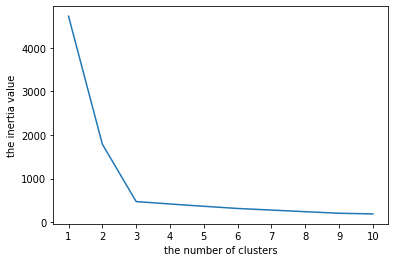

In [13]:
list_of_ks = range(1,11)  # create a list of elements 1,2,3 ... 10
inertias, kmeans_models = get_inertias(list_of_ks, X)  # Get the intertias and the models created from list_of_ks

plt.plot(list_of_ks,inertias)  # Plot the ks versus the intertias
plt.xticks(list_of_ks)  #  set the units on the X axis to be from 1 to 10
plt.xlabel("the number of clusters") 
plt.ylabel('the inertia value')
plt.show()  

**Here clearly we can see that the elbow is for the model with 3 clusters, which actually resembles the number of clusters from original data set**

**Now let's try to create different data set and see how elbow technique performs**

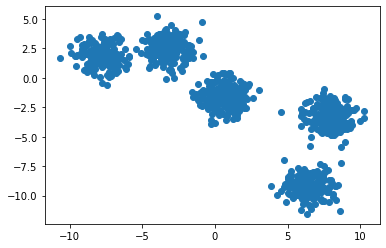

In [14]:
newX, _ = make_blobs(n_samples=1000, centers=5, cluster_std=0.9, random_state=6)
plt.scatter(newX[:,0], newX[:,1])

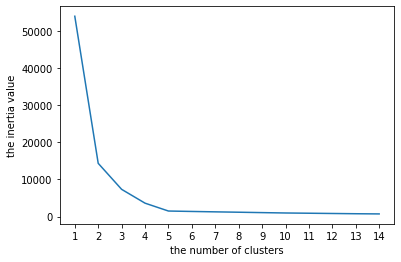

In [15]:
list_of_ks = range(1,15)  # create a list of elements 1,2,3 ... 10
inertias, kmeans_models = get_inertias(list_of_ks, newX)  # Get the intertias and the models created from list_of_ks

plt.plot(list_of_ks,inertias)  # Plot the ks versus the intertias
plt.xticks(list_of_ks)  #  set the units on the X axis to be from 1 to 10
plt.xlabel("the number of clusters") 
plt.ylabel('the inertia value')
plt.show()  

***Now the most optimal valu of clusters seems to be 5***

***Let's get the model with index 4 from our array of models and color the data together with plotting centroids***

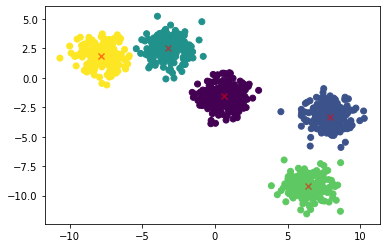

In [16]:
best_model = kmeans_models[4]
labels = best_model.labels_
centroids = best_model.cluster_centers_
plt.scatter(newX[:,0], newX[:,1], c=labels)
plt.scatter(centroids[:,0],centroids[:,1], marker = 'x', color='red', alpha = 0.5)

***While elbow technique is a fast and simple method to determine the number of clusters, it doesn's always gurantee the optimal value of K. Knowledge about the data is a crucial factor while determining the clusters and often involves both an engineer and the person with domain knowledge to cooperate.***

### The end:
That would be the end of this notebook I hope it was of a value.

PS: Feedback always welcome :)
